In [216]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [217]:
pd.options.display.float_format="{:,.2f}".format

In [218]:
df=pd.read_csv("cars.csv")
df.head()

,year,manufacturer,condition,cylinders,fuel,title_status,transmission,drive,size,type,paint_color,price
0,2009,chevrolet,good,8 cylinders,gas,clean,automatic,rwd,full-size,SUV,white,9000
1,2002,gmc,good,8 cylinders,gas,clean,automatic,4wd,NaN,pickup,white,6000
2,2007,pontiac,excellent,4 cylinders,gas,clean,automatic,fwd,compact,convertible,red,7000
3,2012,chevrolet,excellent,8 cylinders,diesel,clean,automatic,4wd,full-size,pickup,silver,37000
4,2003,NaN,fair,8 cylinders,gas,clean,automatic,4wd,NaN,pickup,silver,3700


In [219]:
df.shape

(434542, 12)

In [220]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 434542 entries, 0 to 434541
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   year          434542 non-null  int64 
 1   manufacturer  418698 non-null  object
 2   condition     274367 non-null  object
 3   cylinders     311539 non-null  object
 4   fuel          430894 non-null  object
 5   title_status  431661 non-null  object
 6   transmission  430244 non-null  object
 7   drive         376834 non-null  object
 8   size          181927 non-null  object
 9   type          384280 non-null  object
 10  paint_color   348787 non-null  object
 11  price         434542 non-null  int64 
dtypes: int64(2), object(10)
memory usage: 39.8+ MB


In [221]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
year,"434,542.00","2,008.99",9.12,"1,900.00","2,006.00","2,011.00","2,015.00","2,020.00"
price,"434,542.00","12,082.36","10,346.56",0.00,"3,999.00","9,495.00","17,881.00","50,934.00"


In [223]:
#Finding the null values
(df.isnull().sum()/df.shape[0])*100

year            0.00
manufacturer    3.65
condition      36.86
cylinders      28.31
fuel            0.84
title_status    0.66
transmission    0.99
drive          13.28
size           58.13
type           11.57
paint_color    19.73
price           0.00
dtype: float64

In [224]:
#Dropping all the rows with the word "Other" in order to try to not confuse the neural network
index_names=df[(df["manufacturer"]=="other") | (df["condition"]=="other") | (df["cylinders"]=="other") |(df["fuel"]=="other") | (df["title_status"]=="other") | (df["transmission"]=="other") | (df["drive"]=="other") | (df["size"]=="other") | (df["type"]=="other") | (df["paint_color"]=="other")].index

df.drop(index_names, inplace=True)

In [225]:
#New shape
df.shape

(398868, 12)

In [226]:
#Finding the categorical features and the amount of different values the have

categorical=df.select_dtypes(include="object").columns

for line in categorical:
    print("The feature " + line + " contains" ,  str(len(df[line].unique())) ," distinct values ")
    

The feature manufacturer contains 43  distinct values 
The feature condition contains 7  distinct values 
The feature cylinders contains 8  distinct values 
The feature fuel contains 5  distinct values 
The feature title_status contains 7  distinct values 
The feature transmission contains 3  distinct values 
The feature drive contains 4  distinct values 
The feature size contains 5  distinct values 
The feature type contains 13  distinct values 
The feature paint_color contains 13  distinct values 


In [227]:
#Finding the null values in the categorical features

(df[categorical].isnull().sum()/df[categorical].shape[0])*100


manufacturer    3.54
condition      35.78
cylinders      25.69
fuel            0.86
title_status    0.68
transmission    0.87
drive          11.98
size           55.61
type           12.20
paint_color    19.72
dtype: float64

In [228]:
#Filling the null values with the mode of each feature
for line in categorical:
    df[line]=df[line].fillna(df[categorical].mode()[line][0])  

In [229]:
#Checking if there is still null values

(df[categorical].isnull().sum()/df[categorical].shape[0])*100

manufacturer   0.00
condition      0.00
cylinders      0.00
fuel           0.00
title_status   0.00
transmission   0.00
drive          0.00
size           0.00
type           0.00
paint_color    0.00
dtype: float64

In [230]:
#Creating new features with the help of get_dummies
new_features=pd.get_dummies(df[categorical])

In [231]:
#Concating the new features with the first dataframe
df=pd.concat([df,new_features],axis=1)

In [232]:
#Dropping the categorical columns due to they were transformed in new columns
df=df.drop(columns=categorical)
df.head()

,year,price,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,2009,9000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2002,6000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2007,7000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2012,37000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,2003,3700,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


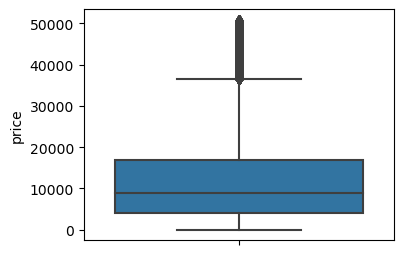

In [238]:
plt.figure(figsize=(4,3));
sns.boxplot(data=df,y="price");

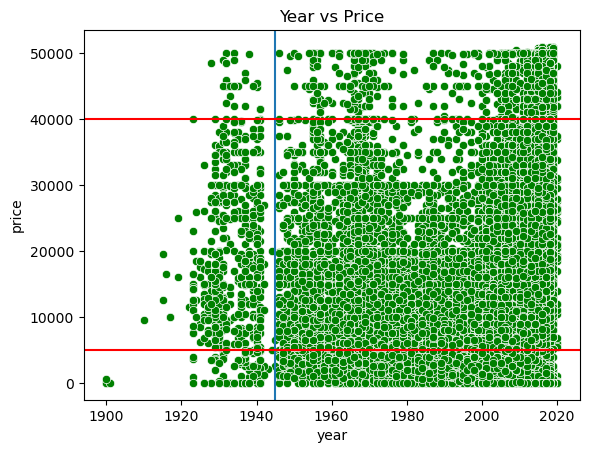

In [239]:
#Analyzing the existing of outliers

sns.scatterplot(data=df,x="year",y="price",color="green");
plt.axvline(1945);
plt.axhline(5000,color="red");
plt.axhline(40000,color="red");
plt.title("Year vs Price");

In [246]:
#The dataframe will work with prices between 5000 and 40000 and a year greater than 1945
df=df[(df["price"].between(5000,40000,inclusive="both")) & (df["year"]> 1945)]
df.head()

,year,price,manufacturer_acura,manufacturer_alfa-romeo,manufacturer_aston-martin,manufacturer_audi,manufacturer_bmw,manufacturer_buick,manufacturer_cadillac,manufacturer_chevrolet,...,paint_color_brown,paint_color_custom,paint_color_green,paint_color_grey,paint_color_orange,paint_color_purple,paint_color_red,paint_color_silver,paint_color_white,paint_color_yellow
0,2009,9000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
1,2002,6000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,2007,7000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
3,2012,37000,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
5,2013,19950,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [247]:
df.shape

(269204, 100)

In [248]:
#Defining X and y
X=df.drop(columns=["price"])
y=df[["price"]]

In [249]:
#Splitting the data in train and test
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

In [250]:
#Standardization the data

from sklearn.preprocessing import StandardScaler

scaler_x=StandardScaler()
scaler_y=StandardScaler()

scaler_x.fit(X_train)
scaler_y.fit(y_train)

X_train=pd.DataFrame(scaler_x.transform(X_train),columns=X_train.columns)
# X_test=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)

y_train=pd.DataFrame(scaler_y.transform(y_train),columns=y_train.columns)
# y_test=pd.DataFrame(scaler_y.transform(y_test),columns=y_test.columns)


In [251]:
#EVALUATING DIFFERENT MACHINE LEARNING MODELS

In [252]:
#Importing the libraries
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import BaggingRegressor,RandomForestRegressor,ExtraTreesRegressor,AdaBoostRegressor,GradientBoostingRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,KFold,cross_val_score,GridSearchCV

In [253]:
#Preparing the models
models={
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "Elastic Net":ElasticNet(),
    "KNN":KNeighborsRegressor(),
    "Decision Tree":DecisionTreeRegressor(),
    "Bagging Regressor":BaggingRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Extra Trees Regressor":ExtraTreesRegressor(),
    "AdaBoostRegressor":AdaBoostRegressor(),
    "GradientBoostingRegressor":GradientBoostingRegressor()
}

#Evaluating the models in turn
results=[]
names=[]
scoring="neg_mean_squared_error"
y_t=y_train.values.reshape(-1,1)
for name, model in models.items():
  kfold=KFold(n_splits=10,shuffle=True)
  cv_results=cross_val_score(model,X_train,y_t.ravel(),cv=kfold,scoring=scoring)
  results.append(cv_results)
  names.append(name)
  print(f"{name} :{cv_results.mean():,.2f} ({cv_results.std():.2f})")


Lasso :-1.00 (0.01)
Ridge :-0.67 (0.01)
Elastic Net :-1.00 (0.01)
KNN :-0.36 (0.01)
Decision Tree :-0.29 (0.01)
Bagging Regressor :-0.24 (0.01)
Random Forest Regressor :-0.23 (0.00)
Extra Trees Regressor :-0.25 (0.00)
AdaBoostRegressor :-0.63 (0.04)
GradientBoostingRegressor :-0.33 (0.01)


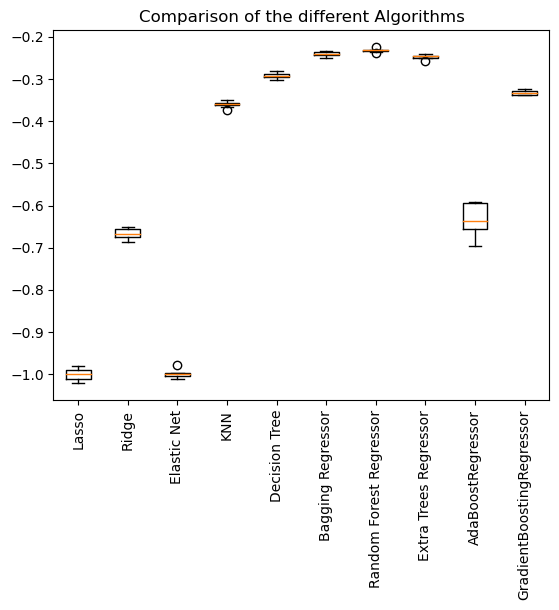

In [254]:
#Comparing the models

import matplotlib.pyplot as plt
import numpy as np

plt.title("Comparison of the different Algorithms")
plt.boxplot(results)
plt.xticks(np.arange(1,len(names)+1),names,rotation="vertical")
plt.show()

In [255]:
#Fine Tuning the best model

import numpy as np

n_estimators=np.arange(2,20)

parameters=dict(n_estimators=n_estimators)

model=RandomForestRegressor()

kfold=KFold(n_splits=10,shuffle=True)

grid_result=GridSearchCV(estimator=model,param_grid=parameters,cv=kfold)

y_t=y_train.values.reshape(-1,1)

grid_result.fit(X_train,y_t.ravel())

#Summarize_results
print("Best : %f using the params : %s" % (grid_result.best_score_ , grid_result.best_params_))

means=grid_result.cv_results_["mean_test_score"]
stds=grid_result.cv_results_["std_test_score"]
params=grid_result.cv_results_["params"]

for mean,stdev,param in zip(means,stds,params):
  print("%f (%f) with %r" % (mean,stdev,param))

Best : 0.764037 using the params : {'n_estimators': 19}
0.723645 (0.006764) with {'n_estimators': 2}
0.738942 (0.005773) with {'n_estimators': 3}
0.745404 (0.006160) with {'n_estimators': 4}
0.750104 (0.005992) with {'n_estimators': 5}
0.753110 (0.006565) with {'n_estimators': 6}
0.755293 (0.005571) with {'n_estimators': 7}
0.757004 (0.005794) with {'n_estimators': 8}
0.758166 (0.005943) with {'n_estimators': 9}
0.759144 (0.006312) with {'n_estimators': 10}
0.760727 (0.006037) with {'n_estimators': 11}
0.760867 (0.006448) with {'n_estimators': 12}
0.762040 (0.006602) with {'n_estimators': 13}
0.761718 (0.006520) with {'n_estimators': 14}
0.762505 (0.006467) with {'n_estimators': 15}
0.762727 (0.006329) with {'n_estimators': 16}
0.763111 (0.006591) with {'n_estimators': 17}
0.763767 (0.005577) with {'n_estimators': 18}
0.764037 (0.006392) with {'n_estimators': 19}


In [256]:
#Saving the scalers
from pickle import dump
dump(scaler_x,open("scaler_x.pkl","wb"))
dump(scaler_y,open("scaler_y.pkl","wb"))


In [257]:
#Saving the fine_tuned model
dump(grid_result,open("best_model_sklearn.pkl","wb"))

In [258]:
#Evaluating the model using the scalers correctly

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

X_test_scaled=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)

y_pred=pd.DataFrame(scaler_y.inverse_transform(grid_result.predict(X_test_scaled).reshape(-1,1)),columns=y_test.columns)

mae=mean_absolute_error(y_test,y_pred)

mse=mean_squared_error(y_test,y_pred)

r2=r2_score(y_test,y_pred)

print("MAE : %f , MSE : %f , R2 : %f" % (mae,mse,r2))

MAE : 2721.904576 , MSE : 16423863.327535 , R2 : 0.769824


In [259]:
y.mean()[0].round(2)

15492.65

In [260]:
#Proving the results

for i in range(0,20):
    print("Real = {} , Prediction = {} ".format(y_test.values[i][0] , round(y_pred.values[i][0])) )
    

Real = 9750 , Prediction = 11576 
Real = 18750 , Prediction = 17121 
Real = 6495 , Prediction = 5772 
Real = 39000 , Prediction = 37604 
Real = 9330 , Prediction = 8563 
Real = 14981 , Prediction = 14168 
Real = 14999 , Prediction = 10805 
Real = 6900 , Prediction = 8008 
Real = 13995 , Prediction = 13947 
Real = 12999 , Prediction = 11358 
Real = 7399 , Prediction = 7455 
Real = 9995 , Prediction = 13317 
Real = 20900 , Prediction = 17419 
Real = 8995 , Prediction = 11006 
Real = 7000 , Prediction = 30047 
Real = 8995 , Prediction = 8276 
Real = 11950 , Prediction = 14869 
Real = 6599 , Prediction = 9206 
Real = 10995 , Prediction = 16476 
Real = 7990 , Prediction = 7676 


In [261]:
#Saving the columns in a dictionary in order to use them in production

dictionary=dict(zip(X.columns,range(X.shape[1])))

dump(dictionary,open("dictionary.pkl","wb"))

In [262]:
#SOLVING THE PROBLEM WITH ARTIFICIAL NEURAL NETWORKS

In [263]:
#Importing the libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping

In [264]:
early=EarlyStopping(monitor="val_loss", patience=20)

In [265]:
#Creating the model
model=Sequential()
model.add(Dense(256,input_dim=X.shape[1],activation="relu"))
model.add(Dense(128,activation="relu"))
model.add(Dense(64,activation="relu"))
model.add(Dense(32,activation="relu"))
model.add(Dense(16,activation="relu"))
model.add(Dense(8,activation="relu"))
model.add(Dense(1,activation="linear"))

#Compiling the model
model.compile(optimizer="adam", loss="mse")

#Fitting the model
history=model.fit(X_train,y_train,epochs=200,batch_size=32,validation_split=0.25, callbacks=[early])

Epoch 1/200
4417/4417 [==============================] - 15s 3ms/step - loss: 0.3321 - val_loss: 0.2874
Epoch 2/200
4417/4417 [==============================] - 12s 3ms/step - loss: 0.2804 - val_loss: 0.2731
Epoch 3/200
4417/4417 [==============================] - 12s 3ms/step - loss: 0.2701 - val_loss: 0.2711
Epoch 4/200
4417/4417 [==============================] - 12s 3ms/step - loss: 0.2608 - val_loss: 0.2661
Epoch 5/200
4417/4417 [==============================] - 12s 3ms/step - loss: 0.2555 - val_loss: 0.2627
Epoch 6/200
4417/4417 [==============================] - 12s 3ms/step - loss: 0.2499 - val_loss: 0.2570
Epoch 7/200
4417/4417 [==============================] - 12s 3ms/step - loss: 0.2456 - val_loss: 0.2593
Epoch 8/200
4417/4417 [==============================] - 11s 3ms/step - loss: 0.2424 - val_loss: 0.2542
Epoch 9/200
4417/4417 [==============================] - 12s 3ms/step - loss: 0.2387 - val_loss: 0.2551
Epoch 10/200
4417/4417 [==============================] - 12s 3m

In [266]:
y_test_scaled=pd.DataFrame(scaler_y.transform(y_test),columns=y_test.columns)

model.evaluate(X_test_scaled,y_test_scaled)

2524/2524 [==============================] - 4s 1ms/step - loss: 0.2493


0.2493104189634323

In [267]:
#Evaluating the neural network

from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

X_test_scaled=pd.DataFrame(scaler_x.transform(X_test),columns=X_test.columns)

y_pred=pd.DataFrame(scaler_y.inverse_transform(model.predict(X_test_scaled).reshape(-1,1)),columns=y_test.columns)

mae=mean_absolute_error(y_test,y_pred)

mse=mean_squared_error(y_test,y_pred)

r2=r2_score(y_test,y_pred)

print("MAE : %f , MSE : %f , R2 : %f" % (mae,mse,r2))

2524/2524 [==============================] - 5s 1ms/step
MAE : 2939.096472 , MSE : 17836390.577487 , R2 : 0.750027


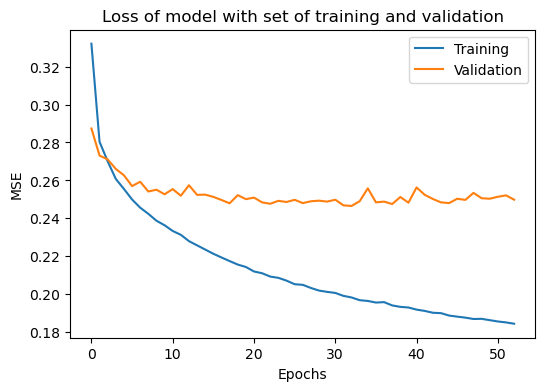

In [270]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=(6,4))
plt.plot(history.history["loss"]);
plt.plot(history.history["val_loss"])
plt.title("Loss of model with set of training and validation")
plt.xlabel("Epochs");
plt.ylabel("MSE");
plt.legend(["Training","Validation"],loc="upper right");

In [269]:
#Proving the results

for i in range(0,20):
    print("Real = {} , Prediction = {} ".format(y_test.values[i][0] , round(y_pred.values[i][0])) )

Real = 9750 , Prediction = 8876 
Real = 18750 , Prediction = 16408 
Real = 6495 , Prediction = 7095 
Real = 39000 , Prediction = 35294 
Real = 9330 , Prediction = 8600 
Real = 14981 , Prediction = 17421 
Real = 14999 , Prediction = 11537 
Real = 6900 , Prediction = 6615 
Real = 13995 , Prediction = 11945 
Real = 12999 , Prediction = 9786 
Real = 7399 , Prediction = 8392 
Real = 9995 , Prediction = 16266 
Real = 20900 , Prediction = 20758 
Real = 8995 , Prediction = 9861 
Real = 7000 , Prediction = 17970 
Real = 8995 , Prediction = 8209 
Real = 11950 , Prediction = 13612 
Real = 6599 , Prediction = 6367 
Real = 10995 , Prediction = 15370 
Real = 7990 , Prediction = 6999 
